CALIFORNIA HOUSING PRICE PREDICTION

Loading cleaned data...
Data loaded: (20640, 12)

STEP 1: Feature Selection
Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal

Feature matrix shape: (20640, 8)
Target vector shape: (20640,)

STEP 2: Train-Test Split
Training set size: 16512 samples (80.0%)
Testing set size: 4128 samples (20.0%)

Training features shape: (16512, 8)
Testing features shape: (4128, 8)

MODEL 1: LINEAR REGRESSION

Training Linear Regression model...
✓ Model trained successfully!

Making predictions on test set...
✓ Predictions completed!

--- Linear Regression Performance ---
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R² Score: 0.5758

Interpretation: The model explains 57.58% of the variance in house prices

--- Feature Importance (Coefficients) ---
AveBedrms: 0.7831
MedInc: 0.4487
Longitude: -0.4337
Latitude: -0

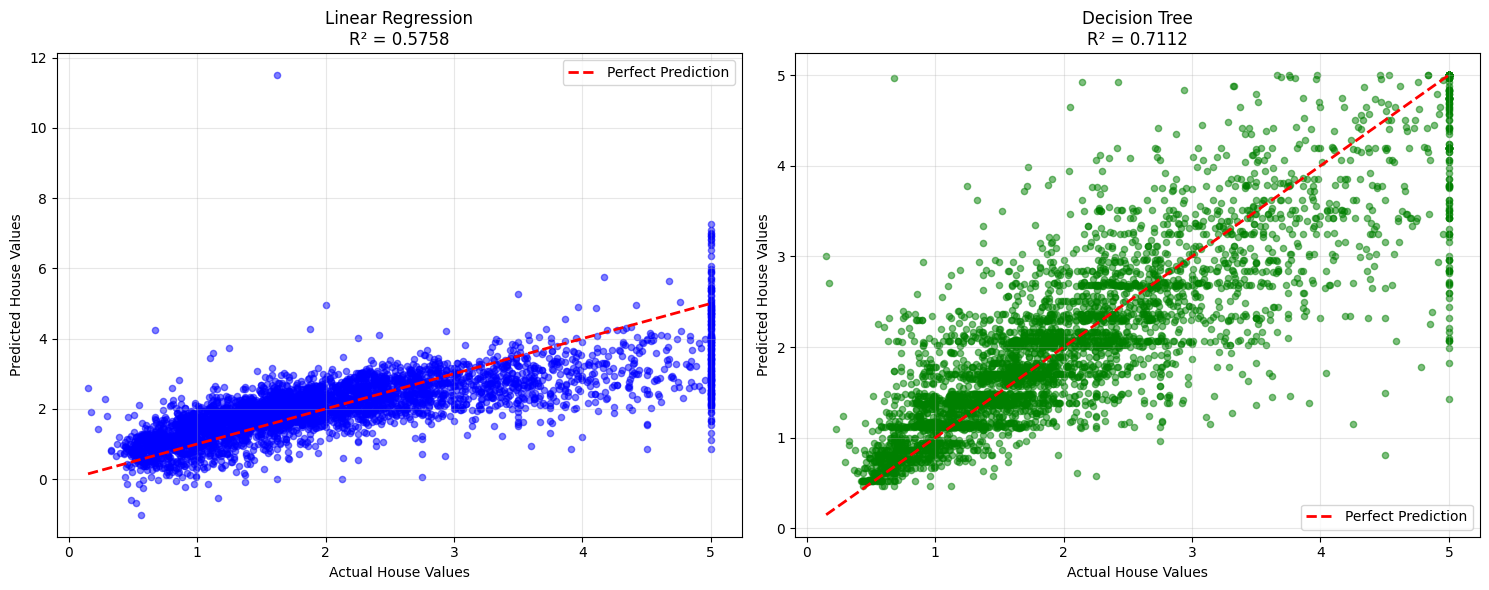

✓ Visualization saved!

VISUALIZATION: Residual Analysis


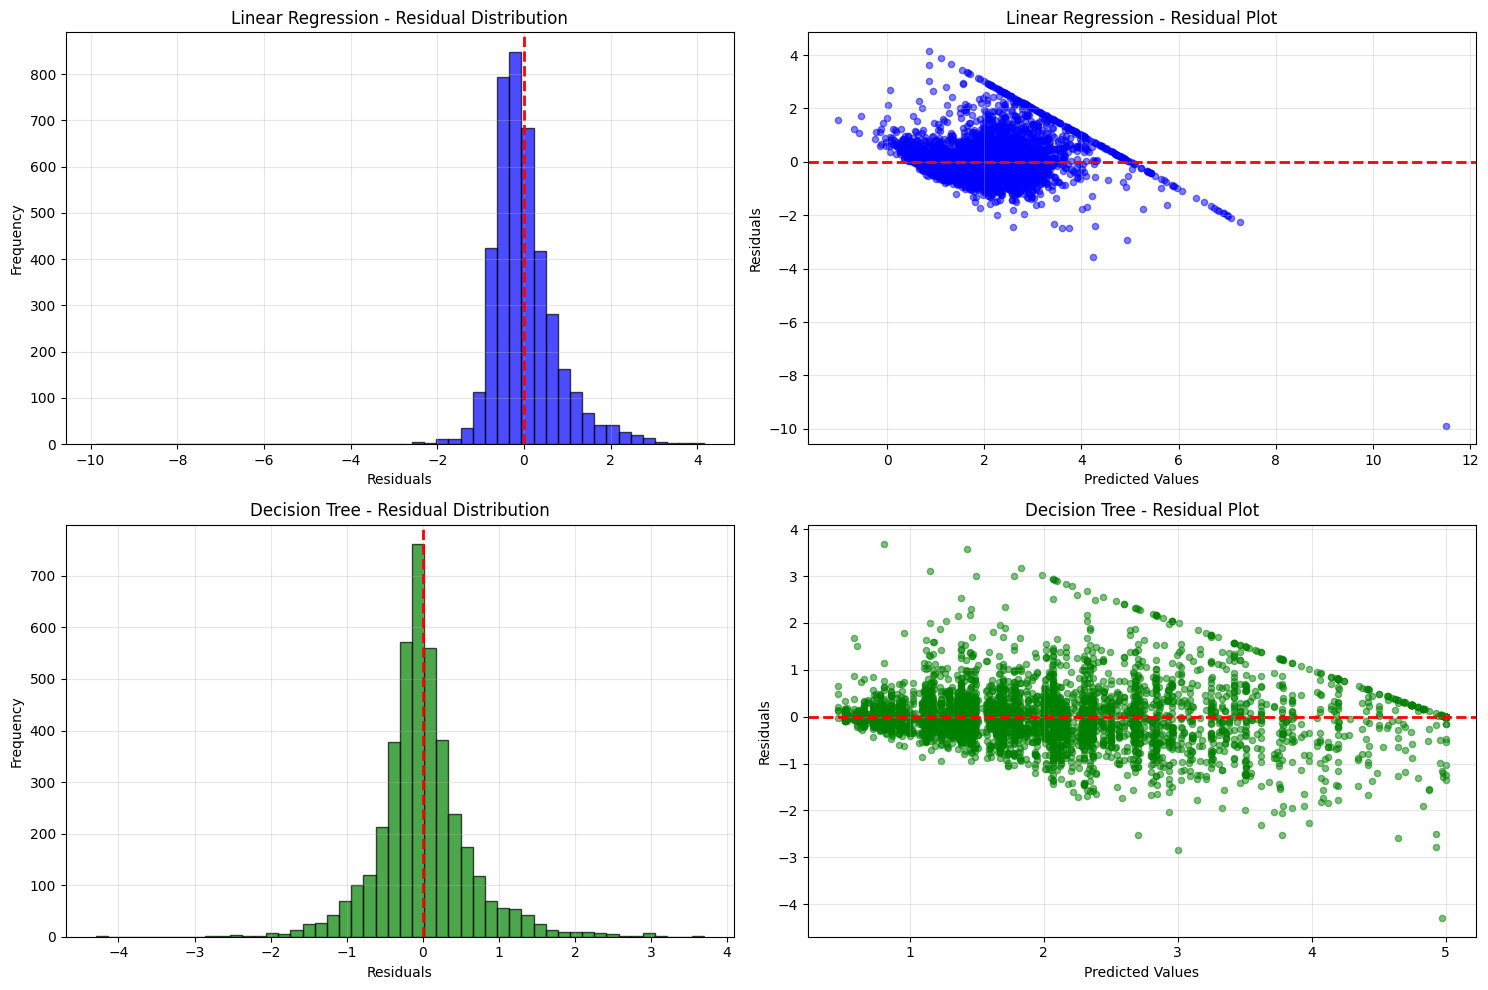

✓ Residual analysis saved!

EXAMPLE PREDICTIONS

Showing 5 random predictions from test set:

Actual Price LR Prediction LR Error DT Prediction DT Error
    $0.7000k      $0.3700k $0.3300k      $1.4600k $0.7600k
    $5.0000k      $2.9300k $2.0700k      $4.6500k $0.3500k
    $0.2800k      $2.2700k $1.9900k      $1.2400k $0.9500k
    $1.5500k      $1.6500k $0.1000k      $1.8200k $0.2700k
    $4.6000k      $2.3800k $2.2200k      $3.3900k $1.2100k

FINAL SUMMARY

1. Dataset: 20640 California houses
2. Features used: 8
3. Models trained: Linear Regression & Decision Tree

4. Best performing model: Decision Tree
   - R² Score: 0.7112
   - RMSE: $0.615200k
   - This means predictions are typically off by ~$62k

5. Key findings:
   - Median income is the most important predictor
   - Geographic location (lat/long) significantly affects prices
   - Both models perform reasonably well (R² > 0.5)
   - Linear Regression is simpler and more interpretable
   - Decision Tree can capture non-linear re

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
import os
warnings.filterwarnings('ignore')

print("="*70)
print("CALIFORNIA HOUSING PRICE PREDICTION")
print("="*70)

# Load the cleaned data
print("\nLoading cleaned data...")
df = pd.read_csv('../data/processed/california_housing_clean.csv')
print(f"Data loaded: {df.shape}")

print("\n" + "="*70)
print("STEP 1: Feature Selection")
print("="*70)

# Select features for modeling
# Using original features that showed good correlation with price
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                'Population', 'AveOccup', 'Latitude', 'Longitude']

X = df[feature_cols]
y = df['MedHouseVal']

print(f"Selected features: {feature_cols}")
print(f"Target variable: MedHouseVal")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

print("\n" + "="*70)
print("STEP 2: Train-Test Split")
print("="*70)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

print("\n" + "="*70)
print("MODEL 1: LINEAR REGRESSION")
print("="*70)

# Train Linear Regression model
print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# Make predictions
print("\nMaking predictions on test set...")
y_pred_lr = lr_model.predict(X_test)
print("✓ Predictions completed!")

# Evaluate the model
print("\n--- Linear Regression Performance ---")
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"R² Score: {lr_r2:.4f}")
print(f"\nInterpretation: The model explains {lr_r2*100:.2f}% of the variance in house prices")

# Feature importance for Linear Regression
print("\n--- Feature Importance (Coefficients) ---")
feature_importance_lr = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for idx, row in feature_importance_lr.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

print("\n" + "="*70)
print("MODEL 2: DECISION TREE REGRESSOR")
print("="*70)

# Train Decision Tree model
print("\nTraining Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=20, 
                                 min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# Make predictions
print("\nMaking predictions on test set...")
y_pred_dt = dt_model.predict(X_test)
print("✓ Predictions completed!")

# Evaluate the model
print("\n--- Decision Tree Performance ---")
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE): {dt_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {dt_mae:.4f}")
print(f"R² Score: {dt_r2:.4f}")
print(f"\nInterpretation: The model explains {dt_r2*100:.2f}% of the variance in house prices")

# Feature importance for Decision Tree
print("\n--- Feature Importance (Split-based) ---")
feature_importance_dt = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance_dt.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)




# Create comparison dataframe
comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'Linear Regression': [lr_mse, lr_rmse, lr_mae, lr_r2],
    'Decision Tree': [dt_mse, dt_rmse, dt_mae, dt_r2]
})

print("\n")
print(comparison.to_string(index=False))

# Determine better model
print("\n--- Analysis ---")
if lr_r2 > dt_r2:
    winner = "Linear Regression"
    diff = (lr_r2 - dt_r2) * 100
    print(f"✓ Linear Regression performs better with {diff:.2f}% higher R² score")
else:
    winner = "Decision Tree"
    diff = (dt_r2 - lr_r2) * 100
    print(f"✓ Decision Tree performs better with {diff:.2f}% higher R² score")

print(f"\nBest Model: {winner}")

print("\n" + "="*70)
print("VISUALIZATION: Prediction vs Actual Values")
print("="*70)



# Create figures directory if it doesn't exist
os.makedirs('../reports/figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.5, s=20, c='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual House Values')
axes[0].set_ylabel('Predicted House Values')
axes[0].set_title(f'Linear Regression\nR² = {lr_r2:.4f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Decision Tree plot
axes[1].scatter(y_test, y_pred_dt, alpha=0.5, s=20, c='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual House Values')
axes[1].set_ylabel('Predicted House Values')
axes[1].set_title(f'Decision Tree\nR² = {dt_r2:.4f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/08_prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved!")

print("\n" + "="*70)
print("VISUALIZATION: Residual Analysis")
print("="*70)

# Calculate residuals
residuals_lr = y_test - y_pred_lr
residuals_dt = y_test - y_pred_dt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Linear Regression residuals histogram
axes[0, 0].hist(residuals_lr, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Linear Regression - Residual Distribution')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].grid(alpha=0.3)

# Linear Regression residuals scatter
axes[0, 1].scatter(y_pred_lr, residuals_lr, alpha=0.5, s=20, c='blue')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Linear Regression - Residual Plot')
axes[0, 1].grid(alpha=0.3)

# Decision Tree residuals histogram
axes[1, 0].hist(residuals_dt, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Decision Tree - Residual Distribution')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(alpha=0.3)




# Decision Tree residuals scatter
axes[1, 1].scatter(y_pred_dt, residuals_dt, alpha=0.5, s=20, c='green')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Decision Tree - Residual Plot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/09_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Residual analysis saved!")

print("\n" + "="*70)
print("EXAMPLE PREDICTIONS")
print("="*70)

# Show some example predictions
print("\nShowing 5 random predictions from test set:\n")
sample_indices = np.random.choice(len(y_test), 5, replace=False)

results_table = []
for idx in sample_indices:
    actual = y_test.iloc[idx]
    pred_lr = y_pred_lr[idx]
    pred_dt = y_pred_dt[idx]
    
    results_table.append({
        'Actual Price': f'${actual:.2f}00k',
        'LR Prediction': f'${pred_lr:.2f}00k',
        'LR Error': f'${abs(actual - pred_lr):.2f}00k',
        'DT Prediction': f'${pred_dt:.2f}00k',
        'DT Error': f'${abs(actual - pred_dt):.2f}00k'
    })

results_df = pd.DataFrame(results_table)
print(results_df.to_string(index=False))

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)

print(f"\n1. Dataset: {len(df)} California houses")
print(f"2. Features used: {len(feature_cols)}")
print(f"3. Models trained: Linear Regression & Decision Tree")
print(f"\n4. Best performing model: {winner}")
print(f"   - R² Score: {max(lr_r2, dt_r2):.4f}")
print(f"   - RMSE: ${min(lr_rmse, dt_rmse):.4f}00k")
print(f"   - This means predictions are typically off by ~${min(lr_rmse, dt_rmse)*100:.0f}k")

print(f"\n5. Key findings:")
print(f"   - Median income is the most important predictor")
print(f"   - Geographic location (lat/long) significantly affects prices")
print(f"   - Both models perform reasonably well (R² > 0.5)")
print(f"   - Linear Regression is simpler and more interpretable")
print(f"   - Decision Tree can capture non-linear relationships")

print("\n" + "="*70)
print("Machine Learning Pipeline Complete!")
print("="*70)
print("\n✓ All results saved to ../reports/figures/")